# Spotify Top 100 Songs (2010-2019) Analysis

In [1]:
# importing appropriate packages
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import plotly.express as px
import re
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from statsmodels.formula.api import ols
from statsmodels.graphics.factorplots import interaction_plot

In [2]:
# reading in the dataset
data = pd.read_csv("https://raw.githubusercontent.com/anchalamba/STA141C/main/data/SpotifyData.csv")
df = pd.DataFrame(data)
df.head()

title      artist    top genre  \
0                  STARSTRUKK (feat. Katy Perry)       3OH!3    dance pop   
1                    My First Kiss (feat. Ke$ha)       3OH!3    dance pop   
2                                I Need A Dollar  Aloe Blacc     pop soul   
3  Airplanes (feat. Hayley Williams of Paramore)       B.o.B  atl hip hop   
4              Nothin' on You (feat. Bruno Mars)       B.o.B  atl hip hop   

   year released       added    bpm  nrgy  dnce   dB  live   val    dur  \
0         2009.0  2022‑02‑17  140.0  81.0  61.0 -6.0  23.0  23.0  203.0   
1         2010.0  2022‑02‑17  138.0  89.0  68.0 -4.0  36.0  83.0  192.0   
2         2010.0  2022‑02‑17   95.0  48.0  84.0 -7.0   9.0  96.0  243.0   
3         2010.0  2022‑02‑17   93.0  87.0  66.0 -4.0   4.0  38.0  180.0   
4         2010.0  2022‑02‑17  104.0  85.0  69.0 -6.0   9.0  74.0  268.0   

   acous  spch   pop  top year artist type  
0    0.0   6.0  70.0    2010.0         Duo  
1    1.0   8.0  68.0    2010.0         Duo  
2   20.0   3.0  72.0    2010.0        Solo  
3   11.0  12.0  80.0    2010.0        Solo  
4   39.0   5.0  79.0    2010.0        Solo

## Data Cleanup

In [3]:
# removing NA values
df = df.dropna().reset_index(drop=True)
df

title              artist  \
0                    STARSTRUKK (feat. Katy Perry)               3OH!3   
1                      My First Kiss (feat. Ke$ha)               3OH!3   
2                                  I Need A Dollar          Aloe Blacc   
3    Airplanes (feat. Hayley Williams of Paramore)               B.o.B   
4                Nothin' on You (feat. Bruno Mars)               B.o.B   
..                                             ...                 ...   
995                                     SICKO MODE        Travis Scott   
996                                      EARFQUAKE  Tyler, The Creator   
997                      Boasty (feat. Idris Elba)               Wiley   
998                    Strike a Pose (feat. Aitch)    Young T & Bugsey   
999      The London (feat. J. Cole & Travis Scott)          Young Thug   

       top genre  year released       added    bpm  nrgy  dnce   dB  live  \
0      dance pop         2009.0  2022‑02‑17  140.0  81.0  61.0 -6.0  23.0   
1      dance pop         2010.0  2022‑02‑17  138.0  89.0  68.0 -4.0  36.0   
2       pop soul         2010.0  2022‑02‑17   95.0  48.0  84.0 -7.0   9.0   
3    atl hip hop         2010.0  2022‑02‑17   93.0  87.0  66.0 -4.0   4.0   
4    atl hip hop         2010.0  2022‑02‑17  104.0  85.0  69.0 -6.0   9.0   
..           ...            ...         ...    ...   ...   ...  ...   ...   
995      hip hop         2018.0  2020‑06‑22  155.0  73.0  83.0 -4.0  12.0   
996      hip hop         2019.0  2020‑06‑22   80.0  50.0  55.0 -9.0  80.0   
997        grime         2019.0  2020‑06‑22  103.0  77.0  89.0 -5.0   9.0   
998    afroswing         2019.0  2020‑08‑20  138.0  58.0  53.0 -6.0  10.0   
999  atl hip hop         2019.0  2020‑06‑22   98.0  59.0  80.0 -7.0  13.0   

      val    dur  acous  spch   pop  top year artist type  
0    23.0  203.0    0.0   6.0  70.0    2010.0         Duo  
1    83.0  192.0    1.0   8.0  68.0    2010.0         Duo  
2    96.0  243.0   20.0   3.0  72.0    2010.0        Solo  
3    38.0  180.0   11.0  12.0  80.0    2010.0        Solo  
4    74.0  268.0   39.0   5.0  79.0    2010.0        Solo  
..    ...    ...    ...   ...   ...       ...         ...  
995  45.0  313.0    1.0  22.0  86.0    2019.0        Solo  
996  41.0  190.0   23.0   7.0  85.0    2019.0        Solo  
997  46.0  177.0    1.0   7.0  68.0    2019.0        Solo  
998  59.0  214.0    1.0  10.0  67.0    2019.0         Duo  
999  18.0  200.0    2.0  15.0  75.0    2019.0        Solo  

[1000 rows x 17 columns]

In [4]:
# outputting dataset structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title          1000 non-null   object 
 1   artist         1000 non-null   object 
 2   top genre      1000 non-null   object 
 3   year released  1000 non-null   float64
 4   added          1000 non-null   object 
 5   bpm            1000 non-null   float64
 6   nrgy           1000 non-null   float64
 7   dnce           1000 non-null   float64
 8   dB             1000 non-null   float64
 9   live           1000 non-null   float64
 10  val            1000 non-null   float64
 11  dur            1000 non-null   float64
 12  acous          1000 non-null   float64
 13  spch           1000 non-null   float64
 14  pop            1000 non-null   float64
 15  top year       1000 non-null   float64
 16  artist type    1000 non-null   object 
dtypes: float64(12), object(5)
memory usage: 132.9+ KB


We can observe that `year released` and `top year` are currently represented as numerical columns. We will convert them into categorical columns.

In [5]:
# converting year(s) from numerical to categorical
df['year released'] = df['year released'].astype(str)
df['year released'] = df['year released'].str.replace(r'.0$', '') # whole numbers
df['top year'] = df['top year'].astype(str)
df['top year'] = df['top year'].str.replace(r'.0$', '') # whole numbers

/var/folders/nm/lzc9m_8s753clk3tj6w285sr0000gn/T/ipykernel_86793/4100502487.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['year released'] = df['year released'].str.replace(r'.0$', '') # whole numbers
/var/folders/nm/lzc9m_8s753clk3tj6w285sr0000gn/T/ipykernel_86793/4100502487.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df['top year'] = df['top year'].str.replace(r'.0$', '') # whole numbers


## Colors

In [6]:
# final color scheme
greens = ['#109618', '#B6E880', '#66AA00', '#1C8356', '#1CBE4F', '#90AD1C', '#479B55', '#86CE00', '#6C7C32', 'rgb(36, 121, 108)', 'rgb(17, 119, 51)', 'rgb(104, 133, 92)', '#1CA71C']

## Exploratory Data Analysis (EDA)

### Top Genre

In [7]:
# creating a histogram to view the count distribution of top genre; descending order
fig = px.histogram(df, x="top genre", title = "Count Distribution of Top Genre", text_auto=True, color_discrete_sequence = greens)
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.update_traces(textposition='outside')

There is a significant difference between the number of dance pop songs and other genre categories. We will attempt to create more evenly divided genres to better represent each category in our analysis.

In [8]:
pd.set_option('display.max_rows', None)

# viewing the counts per top genre as a list
df["top genre"].value_counts()

dance pop                    361
pop                           57
atl hip hop                   39
art pop                       37
hip hop                       21
boy band                      21
canadian hip hop              18
edm                           17
folk-pop                      15
conscious hip hop             14
contemporary country          14
barbadian pop                 14
big room                      13
chicago rap                   13
canadian pop                  13
modern rock                   13
modern alternative rock       12
latin                         10
dfw rap                       10
canadian contemporary r&b     10
melodic rap                    8
emo rap                        8
permanent wave                 8
brostep                        8
british soul                   8
alt z                          8
detroit hip hop                8
pop rap                        7
electropop                     7
gangster rap                   6
australian

The above output lists the number of songs that fall under each genre in the dataset, as it is difficult to read off of the above histogram. 

In [9]:
# manually labeled genre columns with re.search(), where we found key terms within the current genre column 
def genre_new(df):
    mapping = ['dance pop', 'pop', 'hip hop', 'rap', 'rock', 'r&b', 'house', 'dance', 'indie', 'edm', 'country', 'boy band']
    df['top genre new'] = df['top genre'].apply(lambda x: [k for k in mapping if re.search(k, x)])
    df['top genre new'] = df['top genre new'].str[0]
    df["top genre new"].fillna('other', inplace=True)
    return df

In [10]:
# using mulitprocessing for creating genre columns with a for loop
import multiprocess as mp

if __name__ == '__main__':
    p = mp.Process(target=genre_new, args=(df,))
    p.start()
    p.join()

In [11]:
df = genre_new(df)

In [12]:
# creating a histogram to view the count distribution of top genre; descending order
fig = px.histogram(df, x="top genre new", title = "Count Distribution of Top Genre (Updated)", text_auto=True, color_discrete_sequence = greens)
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.update_traces(textposition='outside')

The count distribution of top genre is outputted above, with "dance pop", "pop", and "hip hop" being the most prevalent genres among the top 100 Spotfiy songs.

In [13]:
# boxplot for pop scores
px.box(df, x="top year", y="pop", color = "top year", title = "Distribution of Popularity Scores Per Top Year", color_discrete_sequence = greens)

In [14]:
# stacked bar chart of "genre" per year
# fig = px.bar(df, x="top year", color="top genre new", title = "Distribution of Top Genre Per Year")
fig = px.histogram(df, y="top year",
                color = "top genre new",
                   barnorm='percent', text_auto='.1f',
                   title="Distribution of Top Genre Per Year", color_discrete_sequence=greens)

#for the sequential colors option
#px.colors.sequential.Plasma
#px.colors.qualitative.Alphabet

fig.update_layout(
    autosize=False,
    width=1000,
    height=1200,
    yaxis={'categoryorder':'total descending'}
    
)

fig.show()

The "dance pop" genre consistently makes up the largest proportion of top songs each year (2010-2019). "Pop" is the second largest proportion except for 2010, 2017 and 2018, where "hip hop" either equates or is greater in proportion.

### Artist

In [15]:
fig = px.histogram(df, x="artist", title = "Count Distribution of Top Artists", text_auto=True, color_discrete_sequence=greens)
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.update_traces(textposition='outside')

In [16]:
df["artist"].value_counts()

Taylor Swift                21
Drake                       18
Calvin Harris               18
Rihanna                     14
Ariana Grande               14
Bruno Mars                  13
Maroon 5                    11
Post Malone                 10
Jason Derulo                10
Ed Sheeran                  10
Chris Brown                 10
One Direction                9
David Guetta                 9
Katy Perry                   9
Kendrick Lamar               9
Kesha                        8
The Weeknd                   8
The Chainsmokers             8
Imagine Dragons              8
Coldplay                     8
Adele                        7
Selena Gomez                 7
Marshmello                   7
Lana Del Rey                 7
Avicii                       7
Usher                        6
Billie Eilish                6
Lorde                        6
Trey Songz                   6
Migos                        6
Pitbull                      6
Lady Gaga                    6
Cardi B 

In [17]:
df["artist"].nunique()

444

Since there are 444 unique artists that have released a top song in their respective years, we will focus on the top artists who have appeared at least 10 times in this dataset. Specifically, we will focus on the artists:    
- Taylor Swift
- Drake
- Calvin Harris
- Rihanna
- Ariana Grande
- Bruno Mars
- Maroon 5
- Post Malone
- Jason Derulo
- Ed Sheeran
- Chris Brown

In [18]:
top_artists_list = df["artist"].value_counts().index.tolist()
top_artists_df = df[df['artist'].isin(top_artists_list[:11])].reset_index()
top_artists_df.head()

index                               title       artist         top genre  \
0      8                 Talking to the Moon   Bruno Mars         dance pop   
1      9                Just the Way You Are   Bruno Mars         dance pop   
2     12  Deuces (feat. Tyga & Kevin McCall)  Chris Brown         dance pop   
3     16                                Over        Drake  canadian hip hop   
4     17                      Find Your Love        Drake  canadian hip hop   

  year released       added    bpm  nrgy  dnce   dB  live   val    dur  acous  \
0          2010  2022‑02‑17  146.0  59.0  50.0 -5.0  11.0   8.0  218.0   51.0   
1          2010  2022‑02‑17  109.0  84.0  64.0 -5.0   6.0  42.0  221.0    1.0   
2          2011  2022‑02‑17   74.0  74.0  69.0 -5.0   8.0  22.0  277.0    3.0   
3          2010  2022‑02‑17  100.0  85.0  35.0 -6.0  12.0  45.0  234.0    1.0   
4          2010  2022‑02‑17   96.0  61.0  63.0 -6.0   3.0  76.0  209.0    2.0   

   spch   pop top year artist type top genre new  
0   3.0  87.0     2010        Solo     dance pop  
1   4.0  86.0     2010        Solo     dance pop  
2  11.0  74.0     2010        Solo     dance pop  
3  20.0  72.0     2010        Solo       hip hop  
4  17.0  70.0     2010        Solo       hip hop

In [19]:
# boxplot for pop scores
px.box(top_artists_df, x="artist", y="pop", color = "artist", title = "Distribution of Popularity Scores Per Top Artist", color_discrete_sequence=greens)

In [20]:
# stacked bar chart of "genre" per year
# fig = px.bar(df, x="top year", color="top genre new", title = "Distribution of Top Genre Per Year")

fig = px.histogram(top_artists_df, y="top year",color= "artist",
                   barnorm='percent', text_auto='.1f',
                   title="Distribution of Top Artist Per Year", color_discrete_sequence=greens)
#for the sequential colors option
#px.colors.sequential.Plasma
#px.colors.qualitative.Alphabet

fig.update_layout(
    autosize=False,
    width=1000,
    height=800
)

fig.update_yaxes(categoryorder='category descending')
fig.show()

### Artist Type

In [21]:
# creating histogram of 
fig = px.histogram(df, x="artist type", title = "Distribution of Top Artists", text_auto=True, color_discrete_sequence = greens)
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.update_traces(textposition='outside')

In [22]:
# boxplot for pop scores
px.box(df, x="artist type", y="pop", color = "artist type", title = "Distribution of Popularity Scores Per Artist Type", color_discrete_sequence = greens)

In [23]:
# stacked bar chart of "genre" per year
fig = px.histogram(df, y="top year",
                color= "artist type",
                   barnorm='percent', text_auto='.1f',
                   title="Distribution of Artist Type Per Year", color_discrete_sequence=greens)

fig.update_layout(
    autosize=False,
    width=1000,
    height=1200
)

fig.update_yaxes(categoryorder='category descending')
fig.show()

### Pop

In [24]:
# boxplot for pop scores
px.box(df, x="top year", y="pop", color = "top year", title = "Distribution of Popularity Scores Per Top Year", color_discrete_sequence = greens)

### Time Series Exploration

In [25]:
# grouping popularity scores by top year
pop_df = pd.DataFrame(df.groupby('top year')['pop'].mean().reset_index())
pop_df.head()

top year    pop
0     2010  70.18
1     2011  73.05
2     2012  72.85
3     2013  73.81
4     2014  74.32

In [26]:
# time series of pop score averages over the years
px.line(pop_df, x='top year', y='pop', title = "Average Pop Scores (2010-2019)", color_discrete_sequence = greens)

In [27]:
# grouping average popularity scores by top genre per year
pop_genre_df = pd.DataFrame(df.groupby(['top year', 'top genre new'])['pop'].mean().reset_index())
pop_genre_df.head()

top year top genre new   pop
0     2010      boy band  63.0
1     2010       country  73.5
2     2010         dance  65.0
3     2010     dance pop  71.5
4     2010           edm  55.0

In [28]:
# time series of pop score averages over the years (color by genre)
px.line(pop_genre_df, x='top year', y='pop', color = 'top genre new', title = "Average Pop Scores by Genre (2010-2019)", color_discrete_sequence = greens)

In [29]:
# grouping the popularity scores by top artist for each year
pop_artist_df = pd.DataFrame(top_artists_df.groupby(['top year', 'artist'])['pop'].mean().reset_index())
pop_artist_df.head()

top year        artist        pop
0     2010    Bruno Mars  86.500000
1     2010   Chris Brown  74.000000
2     2010         Drake  71.000000
3     2010  Jason Derulo  69.666667
4     2010      Maroon 5  70.000000

In [30]:
# time series of pop score averages over the years (color by top 11 artists)
fig = px.line(pop_artist_df, x='top year', y='pop', color = 'artist', title = "Average Pop Scores by Top Artist (2010-2019)", color_discrete_sequence = greens)
fig.update_xaxes(categoryorder='category ascending')

In [31]:
# grouping the popularity scores by artist type for each year
pop_artistype_df = pd.DataFrame(top_artists_df.groupby(['top year', 'artist type'])['pop'].mean().reset_index())
pop_artistype_df.head()

top year artist type        pop
0     2010  Band/Group  70.000000
1     2010        Solo  72.312500
2     2011  Band/Group  75.000000
3     2011        Solo  75.533333
4     2012  Band/Group  71.500000

In [32]:
# time series of pop score averages over the years (color by artist type)
fig = px.line(pop_artistype_df, x='top year', y='pop', color = 'artist type', title = "Average Pop Scores by Artist Type (2010-2019)", color_discrete_sequence = greens)
fig.update_xaxes(categoryorder='category ascending')

### Word Cloud
A word cloud is helpful for visualizing the most common words among the categorical features in our dataset. Since there are only a few columns that give us text data, some words will be repeated.

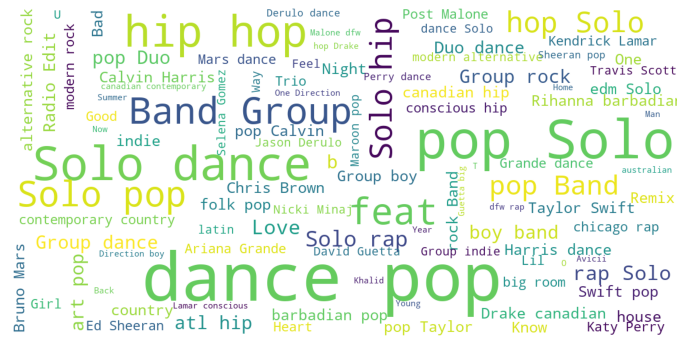

In [33]:
stopwords = set(STOPWORDS)

def show_wordcloud(data, title=None):
    wordcloud = WordCloud(
        background_color="white",
        stopwords=stopwords,
        max_words=100,
        max_font_size=40,
        scale=3,
        random_state=1,
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis("off")
    if title:
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()


show_wordcloud(df)

### Correlation Matrix

<AxesSubplot:>

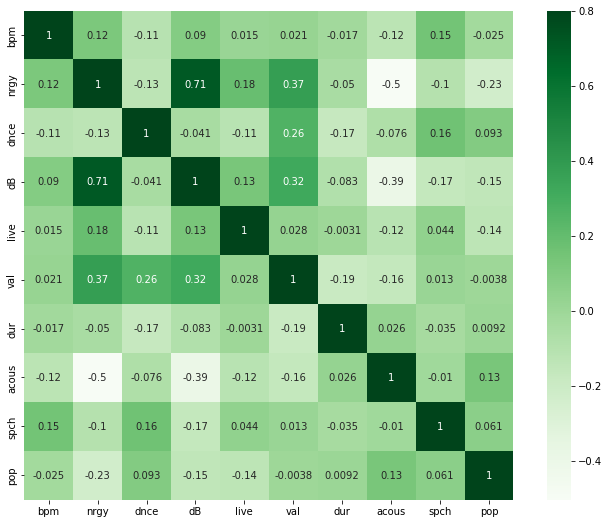

In [34]:
# correlation matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=0.8, square=True, annot = True, cmap="Greens")

In [35]:
# correlation between pop (target) and other variables; sorted from the most to least correlated
corrmat.loc['pop'].abs().sort_values(ascending=False)[1:]

nrgy     0.234011
dB       0.145403
live     0.137305
acous    0.128195
dnce     0.093176
spch     0.061441
bpm      0.025058
dur      0.009219
val      0.003752
Name: pop, dtype: float64

### Contingency Tables

In [36]:
# proportions of top genres per year
pd.crosstab(index=df['top year'],
            columns=df['top genre new'],
            normalize="index")

top genre new  boy band  country  dance  dance pop   edm  hip hop  house  \
top year                                                                   
2010               0.02     0.02   0.01       0.42  0.01     0.18   0.03   
2011               0.01     0.05   0.02       0.45  0.00     0.10   0.02   
2012               0.03     0.01   0.02       0.37  0.02     0.08   0.00   
2013               0.02     0.02   0.01       0.37  0.01     0.10   0.02   
2014               0.04     0.00   0.02       0.39  0.02     0.03   0.03   
2015               0.02     0.01   0.01       0.38  0.05     0.11   0.01   
2016               0.01     0.00   0.03       0.48  0.03     0.05   0.00   
2017               0.02     0.00   0.02       0.25  0.01     0.24   0.00   
2018               0.01     0.03   0.00       0.28  0.01     0.22   0.00   
2019               0.03     0.00   0.01       0.22  0.01     0.15   0.00   

top genre new  indie  other   pop   r&b   rap  rock  
top year                                             
2010            0.01   0.09  0.18  0.00  0.00  0.03  
2011            0.03   0.12  0.16  0.00  0.03  0.01  
2012            0.01   0.09  0.25  0.02  0.03  0.07  
2013            0.01   0.09  0.24  0.01  0.03  0.07  
2014            0.01   0.12  0.26  0.01  0.05  0.02  
2015            0.03   0.05  0.16  0.05  0.06  0.06  
2016            0.00   0.16  0.17  0.03  0.00  0.04  
2017            0.01   0.03  0.22  0.02  0.13  0.05  
2018            0.00   0.17  0.12  0.02  0.12  0.02  
2019            0.00   0.16  0.23  0.00  0.17  0.02

In [37]:
# proportions of artist type per year
pd.crosstab(index=df['top year'],
            columns=df['artist type'],
            normalize="index")

artist type  Band/Group   Duo  Solo  Trio
top year                                 
2010               0.17  0.06  0.77  0.00
2011               0.22  0.07  0.71  0.00
2012               0.28  0.05  0.67  0.00
2013               0.22  0.12  0.66  0.00
2014               0.22  0.08  0.70  0.00
2015               0.14  0.09  0.75  0.02
2016               0.16  0.06  0.76  0.02
2017               0.11  0.09  0.74  0.06
2018               0.08  0.07  0.82  0.03
2019               0.09  0.01  0.90  0.00

In [38]:
# proportions of artist type per year
pd.crosstab(index=top_artists_df['top year'],
            columns=top_artists_df['artist type'],
            normalize="index")

artist type  Band/Group      Solo
top year                         
2010           0.058824  0.941176
2011           0.062500  0.937500
2012           0.142857  0.857143
2013           0.058824  0.941176
2014           0.157895  0.842105
2015           0.000000  1.000000
2016           0.000000  1.000000
2017           0.142857  0.857143
2018           0.071429  0.928571
2019           0.000000  1.000000

### Time Series Exploration for Numerical Columns

In [39]:
# finding the average values for each category by year
num_cols_df = pd.DataFrame(df.groupby('top year').mean().reset_index())
num_cols_df

top year     bpm   nrgy   dnce    dB   live    val     dur  acous   spch  \
0     2010  119.56  76.65  65.29 -4.95  20.66  56.74  226.45   9.62   9.95   
1     2011  127.29  76.10  63.56 -5.16  18.76  54.85  230.19  11.74   8.52   
2     2012  123.10  74.07  64.01 -5.53  19.71  53.29  226.38   9.70   9.27   
3     2013  119.91  72.44  63.55 -5.63  19.13  53.05  229.49  11.52   8.16   
4     2014  119.73  71.03  65.88 -5.46  18.66  50.95  227.90  12.29   7.65   
5     2015  120.86  67.53  65.22 -5.81  17.88  46.82  218.46  15.07   7.66   
6     2016  115.77  65.80  64.53 -5.97  17.12  46.92  219.86  18.42  10.22   
7     2017  122.02  63.16  73.58 -6.08  16.03  47.72  221.04  16.22  12.22   
8     2018  120.55  65.45  70.80 -5.83  15.77  47.56  208.79  18.15  13.15   
9     2019  123.83  62.79  72.34 -6.21  15.39  51.11  195.50  20.96  13.84   

     pop  
0  70.18  
1  73.05  
2  72.85  
3  73.81  
4  74.32  
5  75.28  
6  75.09  
7  77.81  
8  77.58  
9  78.43

In [40]:
def line_graphs(df):
    # set up the subplots
    fig = make_subplots(rows=10, subplot_titles=('Beats per Minute (bpm)',
                                             'Energy (nrgy)', 'Danceability (dnce)', 
                                             'Loudness (dB)', 'Live Recording (live)', 'Positivity (val)',
                                             'Duration (dur)', 'Acousticness (acous)', 
                                             'Focus on Spoken Word (spch)', 'Popularity (pop)'), shared_xaxes=False)
    count = 0
    for i in df.columns[1:]:
        count = count+1
        # for each subplot, add a line graph based on the numerical column
        fig.append_trace(go.Scatter(x=df['top year'],y=df[i],), row=count, col=1)
    fig.update_layout(height=2000, width=1000, title_text="Average Numerical Columns (2010-2019)", showlegend = False)
    fig.show()

In [41]:
# using mulitprocessing for creating stacked line graphs with a for loop
import multiprocess as mp

if __name__ == '__main__':
    p = mp.Process(target=line_graphs, args=(num_cols_df,))
    p.start()
    p.join()

In [43]:
fig = line_graphs(num_cols_df)